# NOTEBOOK SETUP

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATASET OVERVIEW

In [2]:
pokemon = pd.read_csv("pokemon_data.csv")


In [3]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
#Getting basic statistics of the dataset 
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
print(pokemon.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None


In [7]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
# Adding 'Total' feature
pokemon['Total'] = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis=1)
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


In [9]:
# Type-wise stats
type_stats = pokemon.groupby('Type 1').agg({
    'HP': 'mean',
    'Attack': 'mean',
    'Defense': 'mean',
    'Total': 'mean'
}).sort_values(by='Total', ascending=False)
print(type_stats)

                 HP      Attack     Defense       Total
Type 1                                                 
Dragon    83.312500  112.125000   86.375000  550.531250
Steel     65.222222   92.703704  126.370370  487.703704
Flying    70.750000   78.750000   66.250000  485.000000
Psychic   70.631579   71.456140   67.684211  475.947368
Fire      69.903846   84.769231   67.769231  458.076923
Rock      65.363636   92.863636  100.795455  453.750000
Dark      66.806452   88.387097   70.225806  445.741935
Electric  59.795455   69.090909   66.295455  443.409091
Ghost     64.437500   73.781250   81.187500  439.562500
Ground    73.781250   95.750000   84.843750  437.500000
Ice       72.000000   72.750000   71.416667  433.458333
Water     72.062500   74.151786   72.946429  430.455357
Grass     67.271429   73.214286   70.800000  421.142857
Fighting  69.851852   96.777778   65.925926  416.444444
Fairy     74.117647   61.529412   65.705882  413.176471
Normal    77.275510   73.469388   59.846939  401

# DATA CLEANING

In [10]:
#check how many null values in the dataset
print(pokemon.isnull().sum())

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Total           0
dtype: int64


In [11]:
# Handling missing values
pokemon['Type 2'].fillna('None', inplace=True)

In [12]:
# Check for duplicate entries and drop them if found
duplicates = pokemon.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")
if duplicates > 0:
    pokemon = pokemon.drop_duplicates()

Number of duplicate entries: 0


# DESCRIPTIVE ANALYSIS 

In [13]:
# Legendary vs Non-Legendary statistics
print(pokemon.groupby('Legendary').mean())

                    #         HP      Attack    Defense     Sp. Atk  \
Legendary                                                             
False      353.315646  67.182313   75.669388  71.559184   68.454422   
True       470.215385  92.738462  116.676923  99.661538  122.184615   

              Sp. Def       Speed  Generation       Total  
Legendary                                                  
False       68.892517   65.455782    3.284354  417.213605  
True       105.938462  100.184615    3.769231  637.384615  


In [14]:
# Descriptive statistics for primary types
type1_grouped = pokemon.groupby('Type 1').mean()
print("\nAverage stats by Type 1:")
print(type1_grouped[['HP', 'Attack', 'Defense', 'Speed']])


Average stats by Type 1:
                 HP      Attack     Defense       Speed
Type 1                                                 
Bug       56.884058   70.971014   70.724638   61.681159
Dark      66.806452   88.387097   70.225806   76.161290
Dragon    83.312500  112.125000   86.375000   83.031250
Electric  59.795455   69.090909   66.295455   84.500000
Fairy     74.117647   61.529412   65.705882   48.588235
Fighting  69.851852   96.777778   65.925926   66.074074
Fire      69.903846   84.769231   67.769231   74.442308
Flying    70.750000   78.750000   66.250000  102.500000
Ghost     64.437500   73.781250   81.187500   64.343750
Grass     67.271429   73.214286   70.800000   61.928571
Ground    73.781250   95.750000   84.843750   63.906250
Ice       72.000000   72.750000   71.416667   63.458333
Normal    77.275510   73.469388   59.846939   71.551020
Poison    67.250000   74.678571   68.821429   63.571429
Psychic   70.631579   71.456140   67.684211   81.491228
Rock      65.363636   

In [15]:
#DESCRIPTIVE AND COMPARATIVE DATA ANALYSIS
## Average stats by Type 1
avg_stats_by_type = pokemon.groupby('Type 1').mean()
avg_stats_by_type[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750


In [16]:
# Analyze the count distribution of each primary type
type_counts = pokemon['Type 1'].value_counts()
print("\nCount of each primary type:")
print(type_counts)


Count of each primary type:
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


# DATA VISUALIZATION

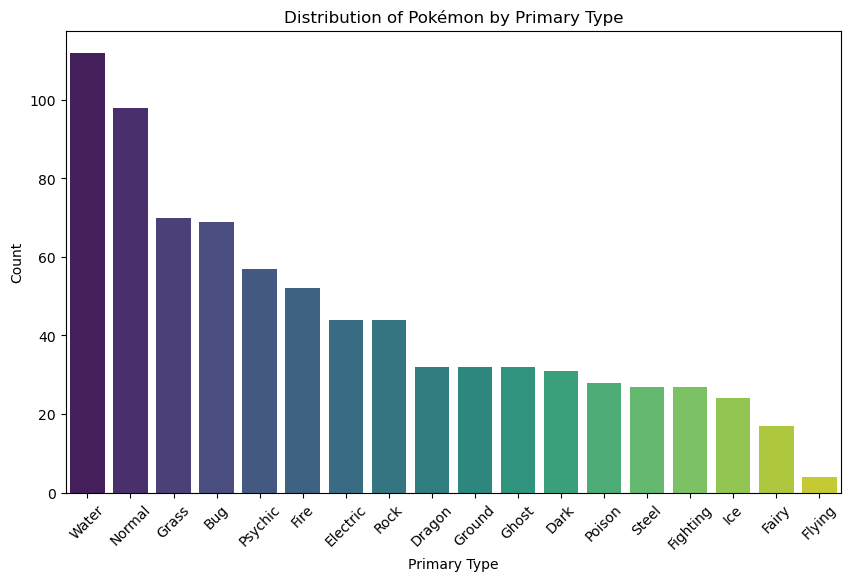

In [17]:
# Distribution of Pokémon primary types
plt.figure(figsize=(10, 6))
sns.countplot(x='Type 1', data=pokemon, palette='viridis', order=pokemon['Type 1'].value_counts().index)
plt.title('Distribution of Pokémon by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

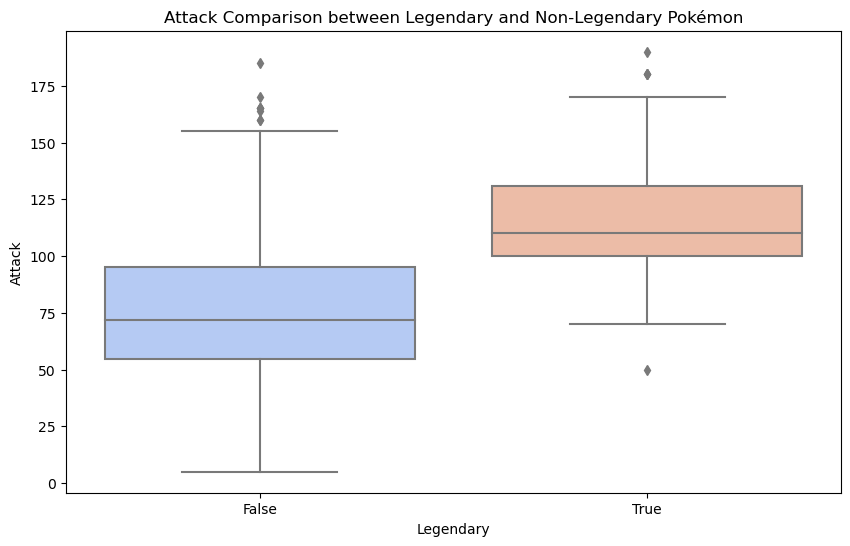

In [18]:
# Boxplot comparison for Legendary vs. Non-Legendary Pokémon by stats
plt.figure(figsize=(10, 6))
sns.boxplot(x='Legendary', y='Attack', data=pokemon, palette='coolwarm')
plt.title('Attack Comparison between Legendary and Non-Legendary Pokémon')
plt.show()

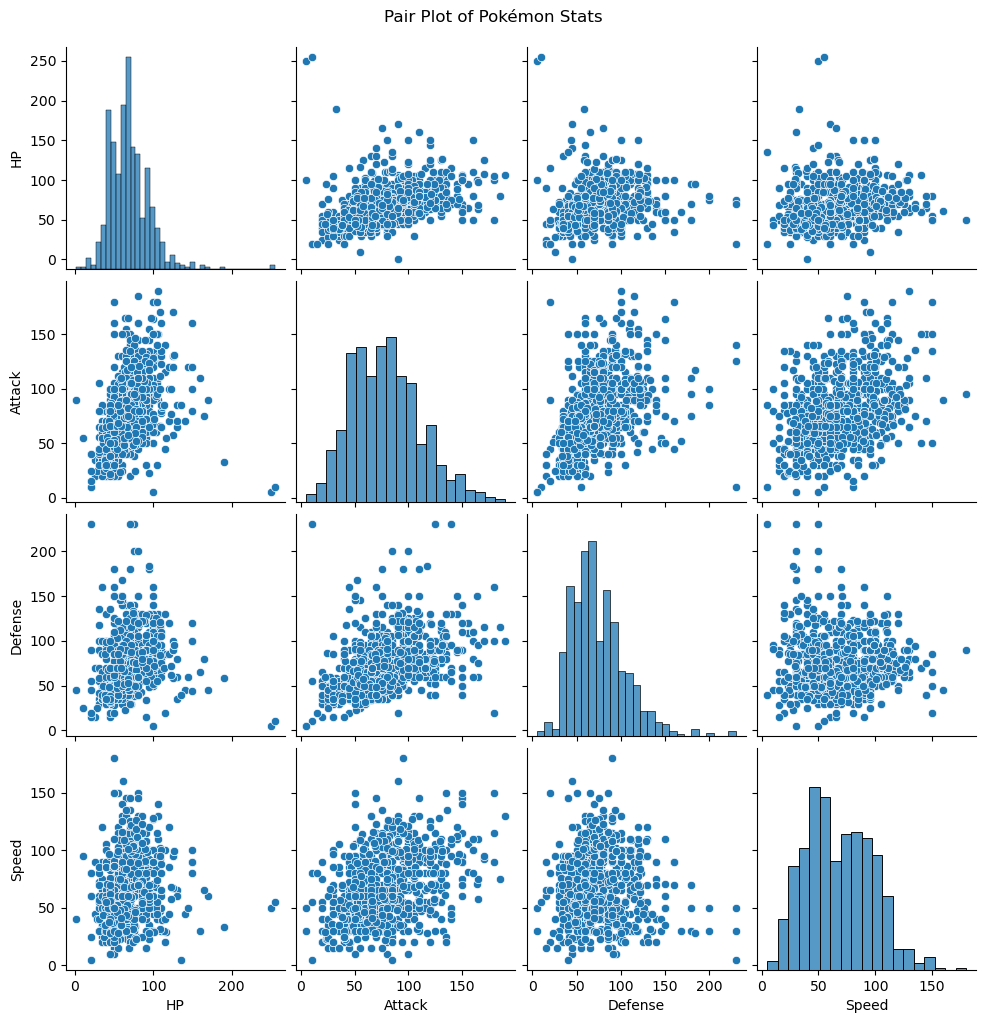

In [19]:
# Pair plot for the stats columns to analyze relationships
stats_columns = ['HP', 'Attack', 'Defense', 'Speed']
sns.pairplot(pokemon[stats_columns])
plt.suptitle("Pair Plot of Pokémon Stats", y=1.02)
plt.show()

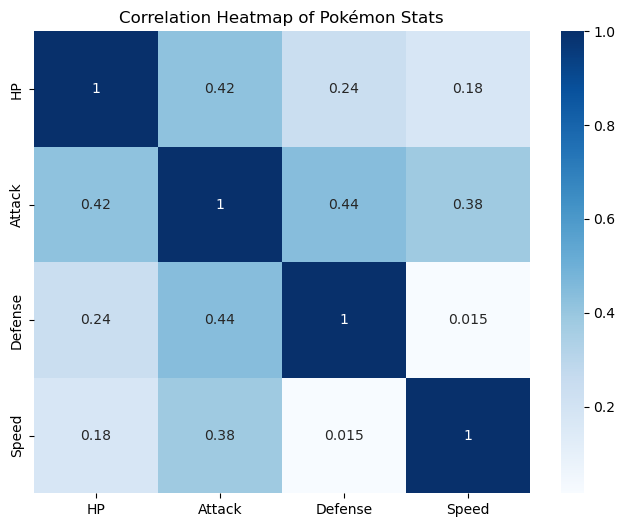

In [20]:
# Heatmap for correlation between stats
plt.figure(figsize=(8, 6))
correlation_matrix = pokemon[stats_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()

# ADVANCED ANALYSIS AND FEATURE EXPLORATION

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection for clustering
features = pokemon[['HP', 'Attack', 'Defense', 'Speed']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [22]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pokemon['Cluster'] = kmeans.fit_predict(scaled_features)

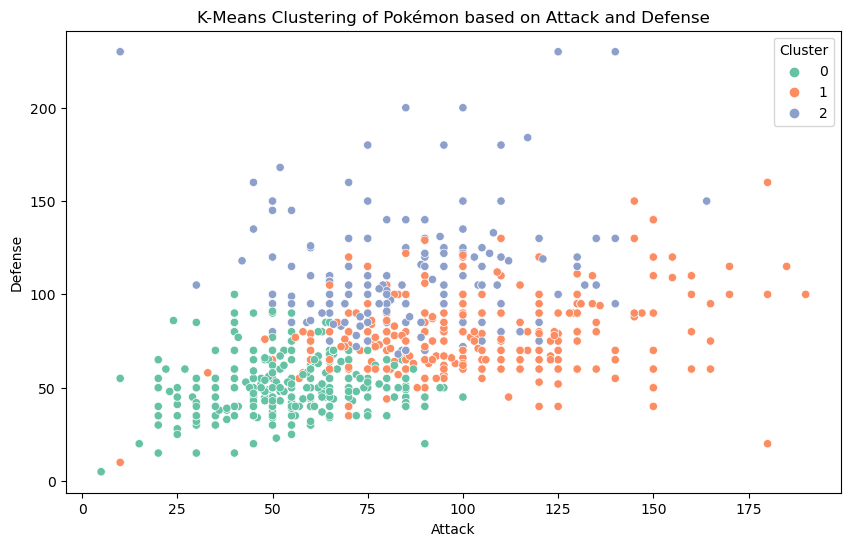

In [23]:
# Plot clusters in a 2D space (Attack vs Defense as example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attack', y='Defense', hue='Cluster', data=pokemon, palette='Set2')
plt.title('K-Means Clustering of Pokémon based on Attack and Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(title='Cluster')
plt.show()


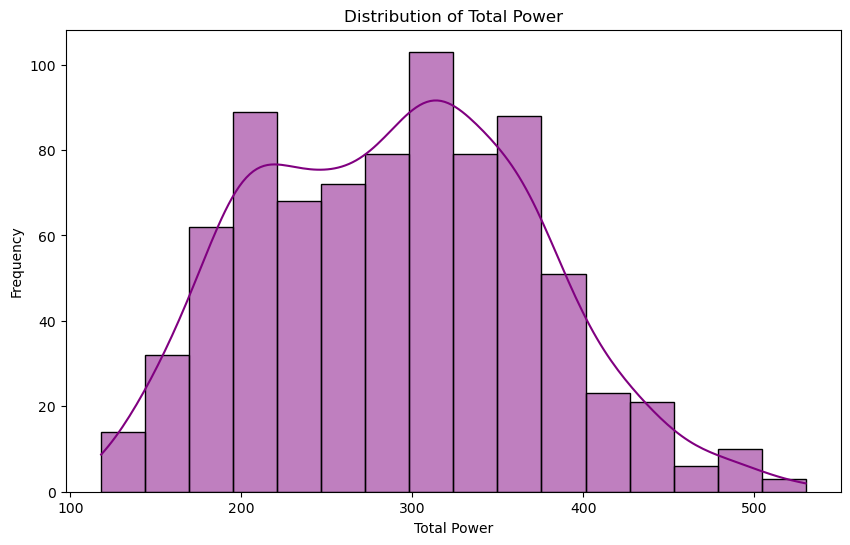

In [24]:
# Example feature engineering: calculating Total Power
pokemon['Total Power'] = pokemon[['HP', 'Attack', 'Defense', 'Speed']].sum(axis=1)

# Analyzing Total Power distribution
plt.figure(figsize=(10, 6))
sns.histplot(pokemon['Total Power'], kde=True, color='purple')
plt.title('Distribution of Total Power')
plt.xlabel('Total Power')
plt.ylabel('Frequency')
plt.show()
